<a href="https://colab.research.google.com/github/LaurentLabine/fcc_data_analysis_python/blob/main/fcc_4_page_view_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB
None


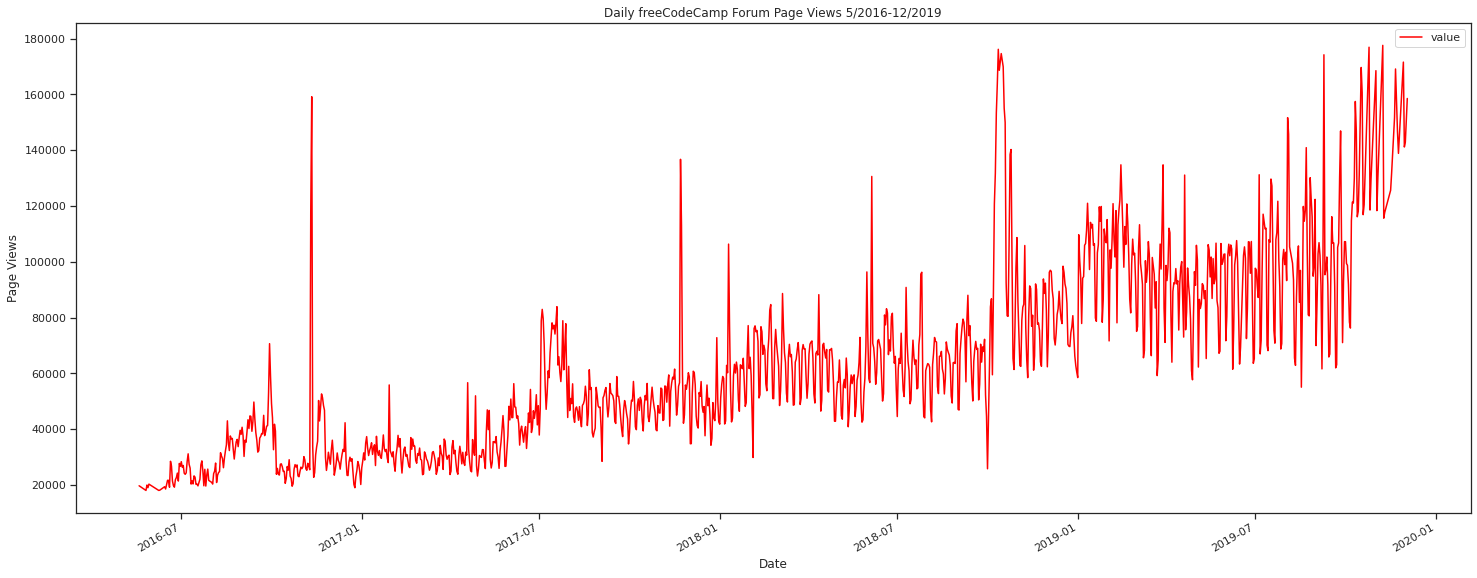

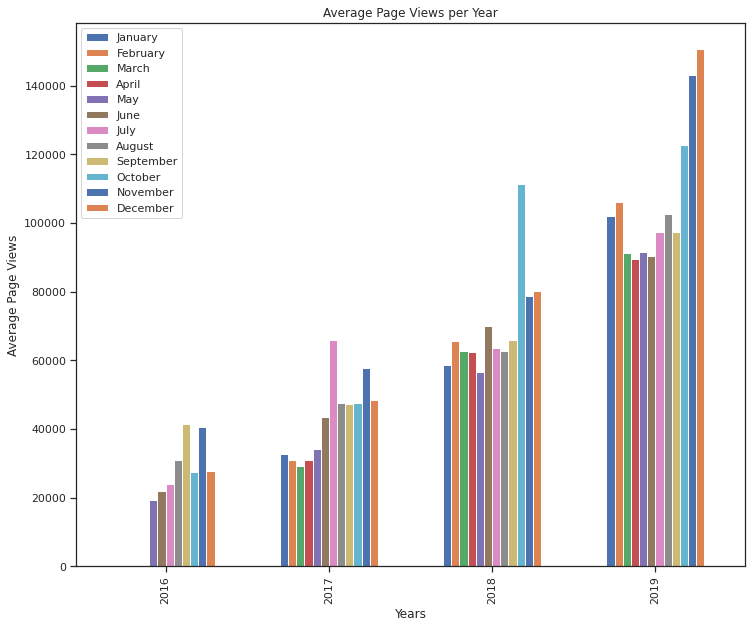

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
register_matplotlib_converters()

data_url = 'https://raw.githubusercontent.com/LaurentLabine/fcc_data_analysis_python/main/fcc-forum-pageviews.csv'
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(data_url, parse_dates=['date'])
print(df.info())

# Clean data
df = df.loc[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

#Draw Line Plot
fig =  df.plot(x="date", figsize=(25,10), color='Red' )
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
# plt.show()

# #Draw bar plot
dfdate = df.groupby([df.date.dt.year, df.date.dt.month]).mean()

fig = dfdate.unstack().plot(kind='bar',figsize=(12, 10),width=0.6).figure
plt.title("Average Page Views per Year")
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(labels=("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))


Text(0.5, 0, 'Month')

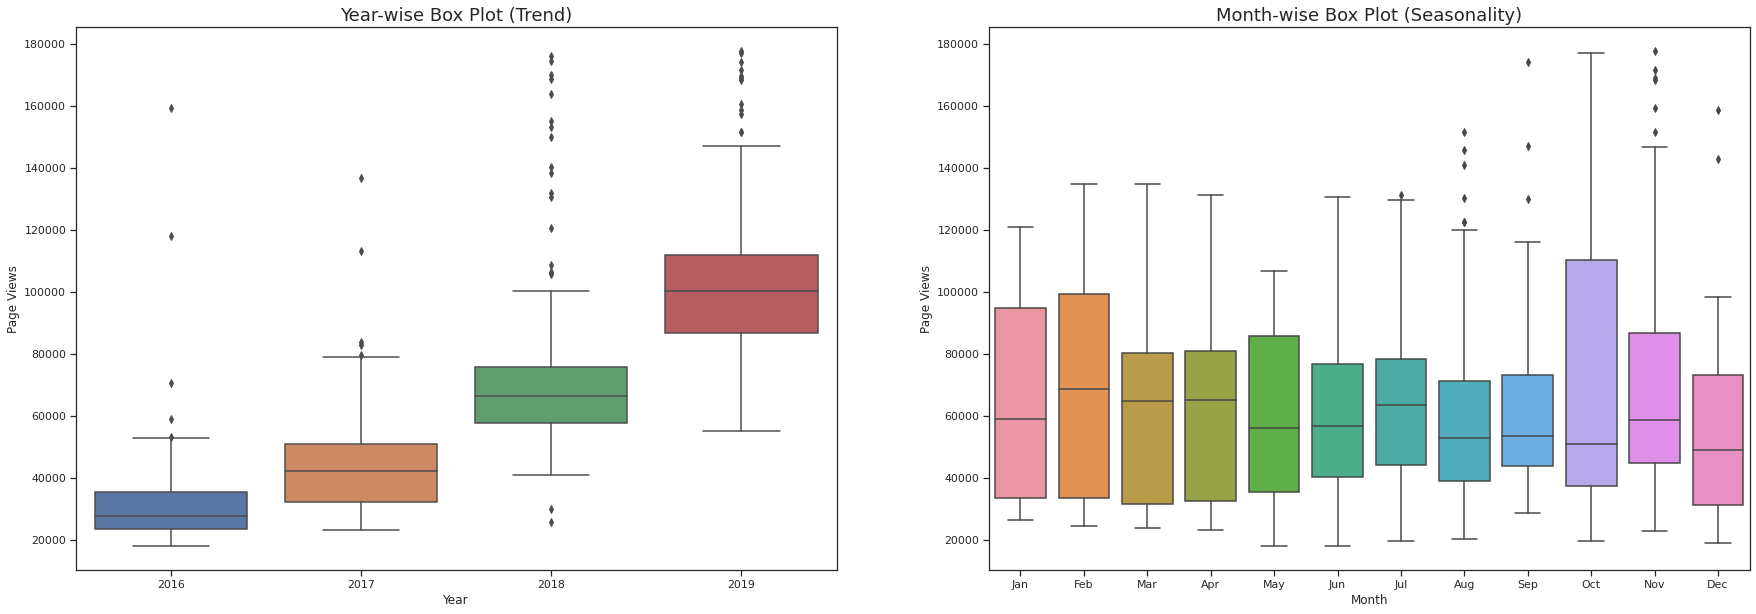

In [ ]:
  # Prepare data for box plots (this part is done!)
  # df = pd.read_csv(data_url, parse_dates=['date'])
  
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]
  

  # Draw box plots (using Seaborn)
  sns.set(style='ticks')
  fig = plt.figure(figsize = (30,10))
  ax1 = fig.add_subplot(121)
  ax1 = sns.boxplot(x='year', y='value', data=df_box)

  ax1.set_title("Year-wise Box Plot (Trend)", fontsize = 18)
  ax1.set_ylabel("Page Views")
  ax1.set_xlabel("Year")

  ax2 = fig.add_subplot(122)
  ax2 = sns.boxplot(x='month', y='value', data=df_box, order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
  ax2.set_title("Month-wise Box Plot (Seasonality)", fontsize = 18)
  ax2.set_ylabel("Page Views")
  ax2.set_xlabel("Month")


# New Section